## Feature Selection and Dimensionality Reduction

## Feature Selection


**Feature Selection** is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

### Three benefits of performing Feature Selection before modeling your data are:

**1. Reduces Overfitting:** Less redundant data means less opportunity to make decisions based on noise.

**2. Improves Accuracy:** Less misleading data means modeling accuracy improves.

**3. Reduces Training Time:** Less data means that algorithms train faster.

TO CHECK THE VERSION OF LIBRARIES

In [1]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.1.0
numpy: 1.14.3
matplotlib: 2.2.2
pandas: 0.23.0
sklearn: 0.19.1


TO IMPORT LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

# To allow plots to appear within the notebook
%matplotlib inline

TO LOAD THE DATASET

In [3]:
dataset = pandas.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


TO DETERMINE THE DIMENSIONS OF THE DATASET

In [4]:
print(dataset.shape)

(768, 9)


TO PEEK AT THE DATA

In [5]:
print(dataset.head(20))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

TO SEE THE STATISTICAL SUMMARY

In [6]:
print(dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

TO SEE THE CLASS DISTRIBUTION

In [7]:
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


TO SHOW THE UNIVARIATE PLOT (BOX and WHISKER PLOTS)

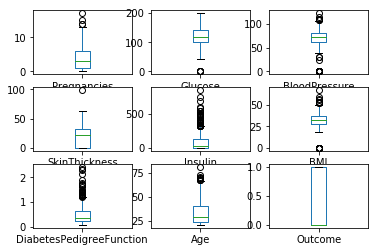

In [8]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plot.show()

TO SHOW THE HISTOGRAM FOR THE DISTRIBUTION

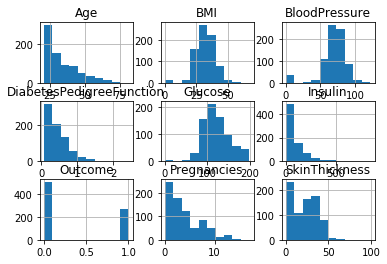

In [9]:
dataset.hist()
plot.show()

FOR THE MULTIVARIATE PLOT

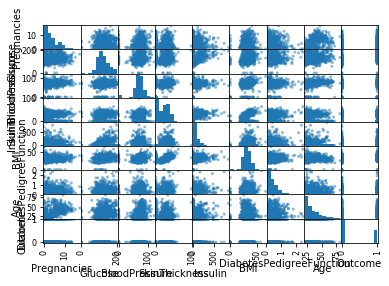

In [10]:
# For the Scatter Plot Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plot.show()

TO CREATE THE MATRIX OF INDEPENDENT VARIABLE, X

In [11]:
X = dataset.iloc[:, 0:8].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

TO CREATE THE MATRIX OF DEPENDENT VARIABLE, Y

In [12]:
Y = dataset.iloc[:,8].values
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

## To Create Machine Learning Models with K-Fold Cross Validation

#### 1. USING LOGISTIC REGRESSION

In [13]:
# To Import the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# To Instantiate the Model (Using the Default Parameters)
logistic_regression = LogisticRegression(random_state=0)

In [14]:
# To Apply K-fold Cross Validation for the Logistic Regression Model Performance
from sklearn.model_selection import KFold
k_Fold = KFold(n_splits=10, shuffle=False, random_state=None)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=logistic_regression, X=X, y=Y, cv=k_Fold, scoring='accuracy')
accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()
print("ACCURACIES IN K-FOLDS:")
print(accuracies)
print('')
print("AVERAGE ACCURACY OF K-FOLDS:")
print(accuracies_average)
print('')
print("ACCURACY VARIANCE OF K-FOLDS:")
print(accuracies_variance)
print('')

ACCURACIES IN K-FOLDS:
[0.7012987  0.81818182 0.74025974 0.71428571 0.77922078 0.75324675
 0.85714286 0.80519481 0.72368421 0.80263158]

AVERAGE ACCURACY OF K-FOLDS:
0.7695146958304853

ACCURACY VARIANCE OF K-FOLDS:
0.04841051924567195



#### 2. USING K NEAREST NEIGHBORS WITH K = 5

In [15]:
# To Import the K Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

# To Instantiate the Model (Using the Default Parameters)
k_nearest_neighbors = KNeighborsClassifier(n_neighbors=5)

In [16]:
# To Apply K-fold Cross Validation for the K Nearest Neighbors Model Performance
from sklearn.model_selection import KFold
k_Fold = KFold (n_splits=10, shuffle=False, random_state=None)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=k_nearest_neighbors, X=X, y=Y, cv=k_Fold, scoring='accuracy')
accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()
print("ACCURACIES IN K-FOLDS:")
print(accuracies)
print('')
print("AVERAGE ACCURACY OF K-FOLDS:")
print(accuracies_average)
print('')
print("ACCURACY VARIANCE OF K-FOLDS:")
print(accuracies_variance)
print('')

ACCURACIES IN K-FOLDS:
[0.63636364 0.83116883 0.7012987  0.63636364 0.71428571 0.75324675
 0.74025974 0.80519481 0.68421053 0.76315789]

AVERAGE ACCURACY OF K-FOLDS:
0.7265550239234451

ACCURACY VARIANCE OF K-FOLDS:
0.06182131406705549



#### 3. USING SUPPORT VECTOR MACHINE

In [17]:
# To Import the Support Vector Machine Model
from sklearn.svm import SVC

# To Instantiate the Model (Using Majority of Default Parameters)
support_vector_machine = SVC(kernel = 'linear', random_state = 0)

In [18]:
# To Apply K-fold Cross Validation for the Support Vector Machine Model Performance
from sklearn.model_selection import KFold
k_Fold = KFold (n_splits=10, shuffle=False, random_state=None)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=support_vector_machine, X=X, y=Y, cv=k_Fold, scoring='accuracy')
accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()
print("ACCURACIES IN K-FOLDS:")
print(accuracies)
print('')
print("AVERAGE ACCURACY OF K-FOLDS:")
print(accuracies_average)
print('')
print("ACCURACY VARIANCE OF K-FOLDS:")
print(accuracies_variance)
print('')

ACCURACIES IN K-FOLDS:
[0.67532468 0.81818182 0.76623377 0.72727273 0.75324675 0.77922078
 0.84415584 0.81818182 0.75       0.78947368]

AVERAGE ACCURACY OF K-FOLDS:
0.7721291866028708

ACCURACY VARIANCE OF K-FOLDS:
0.04695196476186551



## To Perform Different Feature Selection Methods

### A. Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the Chi-squared (chi^2) statistical test for non-negative features to select 4 of the best features from the Pima Indians onset of diabetes dataset.

List of Features:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Selection Scores: [ 111.51969064 1411.88704064   17.60537322   53.10803984 2175.56527292
  127.66934333    5.39268155  181.30368904]

Features and the Selection Scores


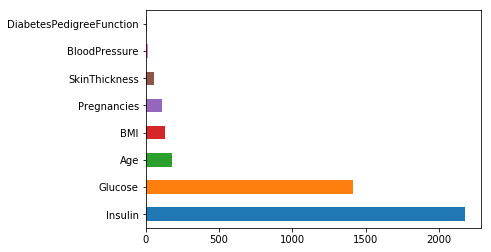

In [19]:
# To Import the Class of SelectKBest and chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# For the List of Features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
print('List of Features:')
print(features)
print('')

# To Perform Feature Selection with SelectKBest
selection_method_skb = SelectKBest(score_func=chi2, k=4)
selection_fit_skb = selection_method_skb.fit(X, Y)

# To Show the Results of Feature Selection
selection_scores = selection_fit_skb.scores_
print('Selection Scores: %s' % selection_scores)
print('')

print('Features and the Selection Scores')
list(zip(features, selection_scores))

#Print('Summary of the Selected Features')
#selected_features_skb = selection_fit_skb.transform(X)
#print(selected_features_skb)
#print('')

feat_importances = pd.Series(selection_scores, index=features)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh') #barh-bargraph horizontal

NOTE: You can see the scores for each attribute and the 4 attributes chosen (those with the highest scores):
   
  Glucose, Insulin, BMI, and Age

#### B. Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

List of Features:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Number of Features: 4
Selected Features: [ True  True False False False  True  True False]
Feature's Ranking: [1 1 2 4 5 1 1 3]

Features, Selected Features, and the Ranking Score:


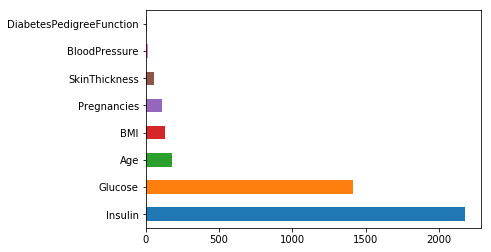

In [20]:
# To Import the Class of RFE
from sklearn.feature_selection import RFE

# For the List of Features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
print('List of Features:')
print(features)
print('')

# To Perform Feature Extraction with RFE using Logistic Regression as the Model
selection_method_rfe = RFE(estimator=logistic_regression, n_features_to_select=4) 
# Note: Logistic Regression has "coef_" or "feature_importances_" attributes (unlike KNN and SVM) that can be used by RFE 
selection_fit_rfe = selection_method_rfe.fit(X, Y)

# To Show the Results of Feature Selection
number_features = selection_fit_rfe.n_features_
selected_features = selection_fit_rfe.support_
features_ranking = selection_fit_rfe.ranking_

print("Number of Features: %s" % number_features)
print("Selected Features: %s" % selected_features)
print("Feature's Ranking: %s" % features_ranking)
print('')

print('Features, Selected Features, and the Ranking Score:')
list(zip(features, selected_features, features_ranking))

feat_importances = pd.Series(selection_scores, index=features)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh') #barh-bargraph horizontal

NOTE: You can see that using the logistic regression model as estimator, the 4 attributes chosen are:

Pregnancies, Glucose, BMI, and DiabetesPedigreeFunction

#### C. Principal Component Analysis

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

In the example below, we use PCA and select 4 principal components.

In [21]:
# To Import the Class of PCA
from sklearn.decomposition import PCA

# For the List of Features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
print('List of Features:')
print(features)
print('')

# To Perform Feature Selection with PCA
selection_method_pca = PCA(n_components=4)
selection_fit_pca = selection_method_pca.fit(X)

# To Summarize the Principal Components
explained_variance = selection_fit_pca.explained_variance_ratio_
print("Explained Variance: %s" % explained_variance)
print('')

print("For the Transformed Component:")
components = selection_fit_pca.components_
print(components)

List of Features:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Explained Variance: [0.88854663 0.06159078 0.02579012 0.01308614]

For the Transformed Component:
[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]
 [-4.90459604e-02  1.19830016e-01 -2.62742788e-01  8.84369380e-01
  -6.55503615e-02  1.92801728e-01  2.69908637e-03 -3.01024330e-01]]


You can see that the transformed dataset (4 principal components) bare little resemblance to the source data.

#### D. Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In the example below we construct a ExtraTreesClassifier classifier for the diabetes dataset.

In [22]:
# To Import Class ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

# For the List of Features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
print('List of Features:')
print(features)
print('')

# To Perform Feature Importance with Extra Trees Classifier
model = ExtraTreesClassifier()
model.fit(X, Y)

# To Show the Results of Feature Importance
importance = model.feature_importances_
print('Importance Score: %s' % importance)
print('')

print('Features and the Importance Score:')
list(zip(features, importance))

List of Features:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Importance Score: [0.10558391 0.22861278 0.10265691 0.07411194 0.07388285 0.14343062
 0.12120098 0.15052001]

Features and the Importance Score:


[('Pregnancies', 0.10558391233176352),
 ('Glucose', 0.2286127767307226),
 ('BloodPressure', 0.10265691163589637),
 ('SkinThickness', 0.07411193896712567),
 ('Insulin', 0.07388284858275021),
 ('BMI', 0.14343062144288443),
 ('DiabetesPedigreeFunction', 0.12120098352657575),
 ('Age', 0.15052000678228142)]

You can see that we are given an importance score for each attribute where the larger scores are the more important attributes. The scores suggest the importance of:

Glucose, Age, BMI, and DiabetesPedigreeFunction

### earoxas2019 & rgdeluna2018